# Tutorial for AQCEL
・Quantum Gate Pattern recognition (level = 1, 2, 3)
<br>
・Circuit Optimization (level = 1, 2)
<br>

In [2]:
import sys
sys.path.append('..')

import warnings
warnings.simplefilter('ignore')

from qiskit import(QuantumCircuit, QuantumRegister, ClassicalRegister)

## Example Circuit

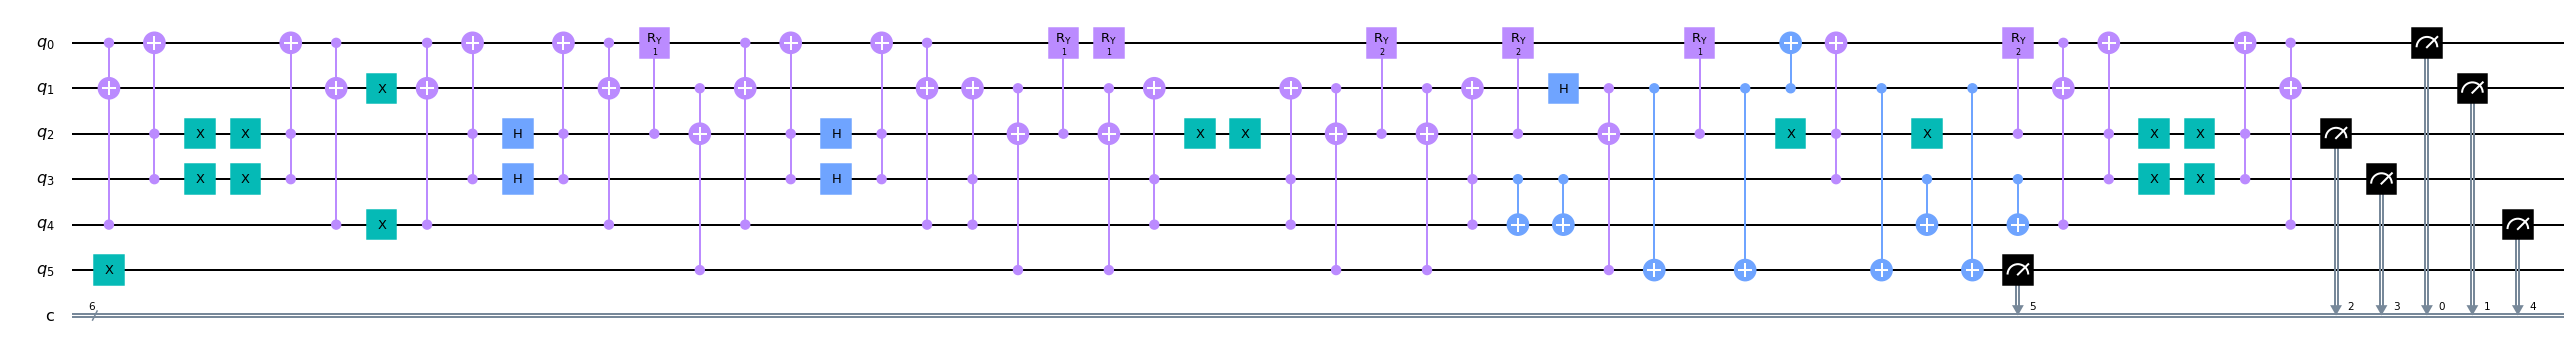

In [3]:
q = QuantumRegister(6, 'q')
c = ClassicalRegister( 6, 'c')
circ = QuantumCircuit(q,c)
circ.toffoli(0,4,1)
circ.toffoli(2,3,0)
circ.x(2)
circ.x(3)
circ.x(2)
circ.x(3)
circ.toffoli(2,3,0)
circ.toffoli(0,4,1)
circ.x(4)
circ.x(1)
circ.toffoli(0,4,1)
circ.toffoli(2,3,0)
circ.h(2)
circ.h(3)
circ.toffoli(2,3,0)
circ.toffoli(0,4,1)
circ.x(5)
circ.cry(1,2,0)
circ.toffoli(1,5,2)
circ.toffoli(0,4,1)
circ.toffoli(2,3,0)
circ.h(2)
circ.h(3)
circ.toffoli(2,3,0)
circ.toffoli(0,4,1)
circ.toffoli(3,4,1)
circ.toffoli(1,5,2)
circ.cry(1,2,0)
circ.toffoli(1,5,2)
circ.toffoli(3,4,1)
circ.x(2)
circ.ry(1,0)
circ.x(2)
circ.toffoli(3,4,1)
circ.toffoli(1,5,2)
circ.cry(2,2,0)
circ.toffoli(1,5,2)
circ.toffoli(3,4,1)
circ.h(1)
circ.cry(2,2,0)
circ.toffoli(1,5,2)
circ.cx(3,4)
circ.cx(1,5)
circ.cry(1,2,0)
circ.cx(1,5)
circ.cx(3,4)
circ.x(2)
circ.cx(1,0)
circ.toffoli(2,3,0)
circ.x(2)
circ.cx(3,4)
circ.cx(1,5)
circ.cry(2,2,0)
circ.cx(1,5)
circ.cx(3,4)
circ.toffoli(0,4,1)
circ.toffoli(2,3,0)
circ.x(2)
circ.x(3)
circ.x(2)
circ.x(3)
circ.toffoli(2,3,0)
circ.toffoli(0,4,1)

for i in range(6):
    circ.measure(i,i)

circ.draw(output='mpl',fold=100)

## Pattern recognition

In [4]:
from aqcel.optimization import pattern

In [5]:
example2 = pattern.recognition( circuit=circ, level=2, n_patterns=4, min_num_nodes=4, max_num_nodes=8, min_n_repetition=2)

In [6]:
circ_max, designated_gates2 = example2.quantum_pattern()

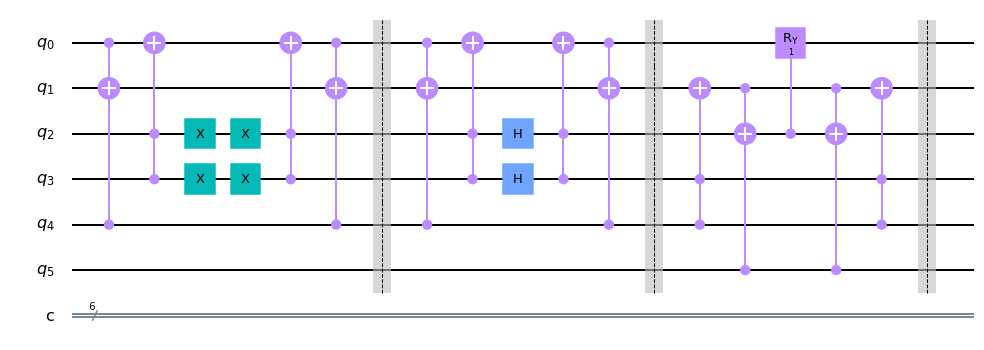

In [7]:
circ_max.draw(output='mpl')

## Circuit Optimization level1

In [8]:
from aqcel.optimization import slim

In [9]:
print(circ.depth(), ',', circ.__len__())
print('Gate counts:', circ.count_ops())

44 , 69
Gate counts: OrderedDict([('ccx', 27), ('x', 15), ('cx', 9), ('cry', 6), ('measure', 6), ('h', 5), ('ry', 1)])


In [10]:
example1 = slim.circuit_optimization( circuit=circ, threshold=None)
circ_op = example1.slim()
print(circ_op.depth(), ',', circ_op.__len__())
print('Gate counts:', circ_op.count_ops())

25 , 37
Gate counts: OrderedDict([('cx', 11), ('cry', 6), ('measure', 6), ('x', 5), ('h', 5), ('ccx', 3), ('ry', 1)])


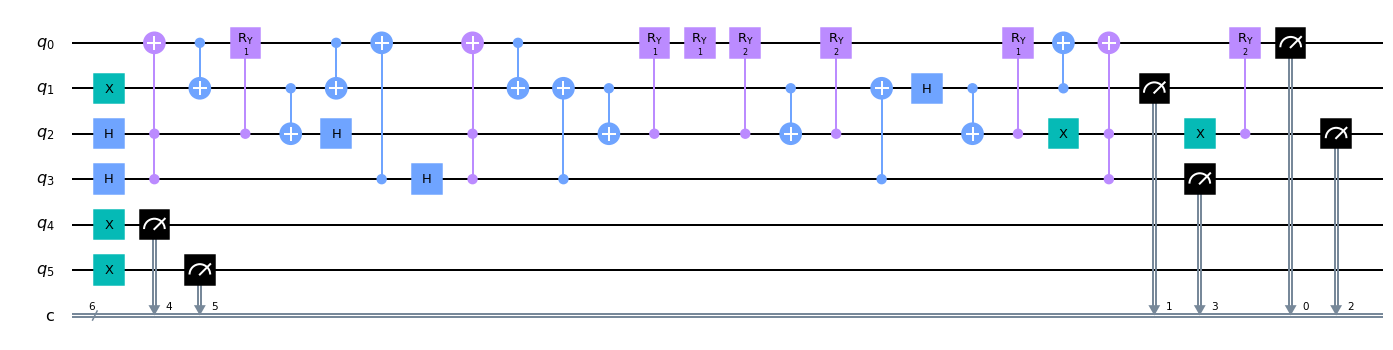

In [11]:
circ_op.draw(output='mpl',fold=100)

 ## Circuit Optimization level 2

In [12]:
from aqcel.optimization import optimization

In [13]:
example3 = optimization.optimizer( circuit=circ, slim_level=2, pattern_level =2, n_patterns=4, min_num_nodes=4, max_num_nodes=8, min_n_repetition=2)

In [14]:
circ_op2 = example3.slimer()

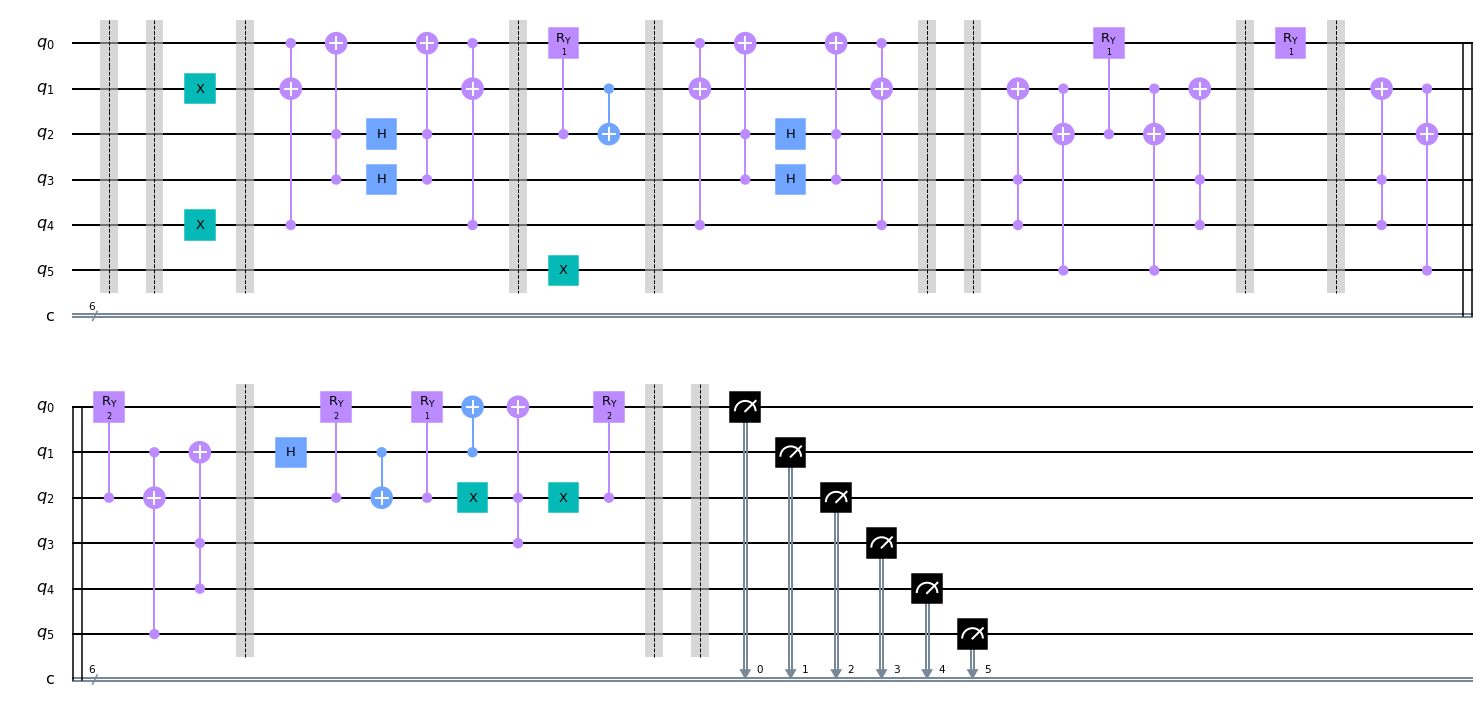

In [15]:
circ_op2.draw(output='mpl',fold=30)